# Fake News Classification - EDA

This notebook is dedicated to explanatory data analysis of Fake News Dataset. To avoid data leakage, EDA is performed only on train set, while test set is discarded for this purposes. **Please note that test set is not explicitly stated, so we randomly choose our own and utilize it through further work.**

## 1. Imports

In [1]:
from collections import Counter
import re

import matplotlib.pyplot as plt
import pandas as pd

import nltk
from sklearn import model_selection
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## 2. Data loading and preprocessing

Please note that all news without title of text are discarded.

In [2]:
data = pd.read_csv('data/WELFake_Dataset.csv', index_col=0)
data = data.dropna()
y, X = data.loc[:, 'label'], data.loc[:, data.columns != 'label']
print(f'Total number of observations: {len(X)}\n')
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Total number of observations: 71537

Ratio of real and fake news:


real    0.510351
fake    0.489649
Name: label, dtype: float64

Explanatory data analysis is performed only on train set, which in this case consists of **67%** of all available news chosen with random state of **256**.

In [3]:
X_train, _, y_train, _ = model_selection.train_test_split(
    X, y, test_size=0.33, random_state=256, stratify=y
)

In [4]:
stopwords = set(nltk.corpus.stopwords.words('english'))
porter_steemer = nltk.stem.PorterStemmer()

In [5]:
def remove_urls(text):
    URL_REGEX = r"[(http(s)?):\/\/(www\.)?a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"
    return re.sub(URL_REGEX, '', text)

def remove_non_alphabetical_characters(text):
    return re.sub('[^a-zA-Z]', ' ', text)
    
def stem_words(text):
    words = text.split()
    return ' '.join(
        [porter_steemer.stem(word) for word in words if word not in stopwords]
    )

def transform_text(text):
    text = remove_urls(text)
    text = remove_non_alphabetical_characters(text)
    text = text.lower()
    text = stem_words(text)
    
    return text

In [6]:
X_train.loc[:, 'title'] = X_train.loc[:, 'title'].apply(transform_text)
X_train.loc[:, 'text'] = X_train.loc[:, 'text'].apply(transform_text)

/Users/ada/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


## 3. Data visualization

The amount of available data is huge and impossible to comprehend by human's mind. However, thanks to WordCloud it is possible to compress information to a human-friendly plot. In this notebook WordCloud are created for two obvious cases:
* all news' titles,
* all news' texts,

and additionally for the following ones with the intention of checking, whether fake news have some easy to spot red flags; 
* titles of fake news,
* titles of real news,
* texts of fake news,
* texts of real news.

#### All news' titles

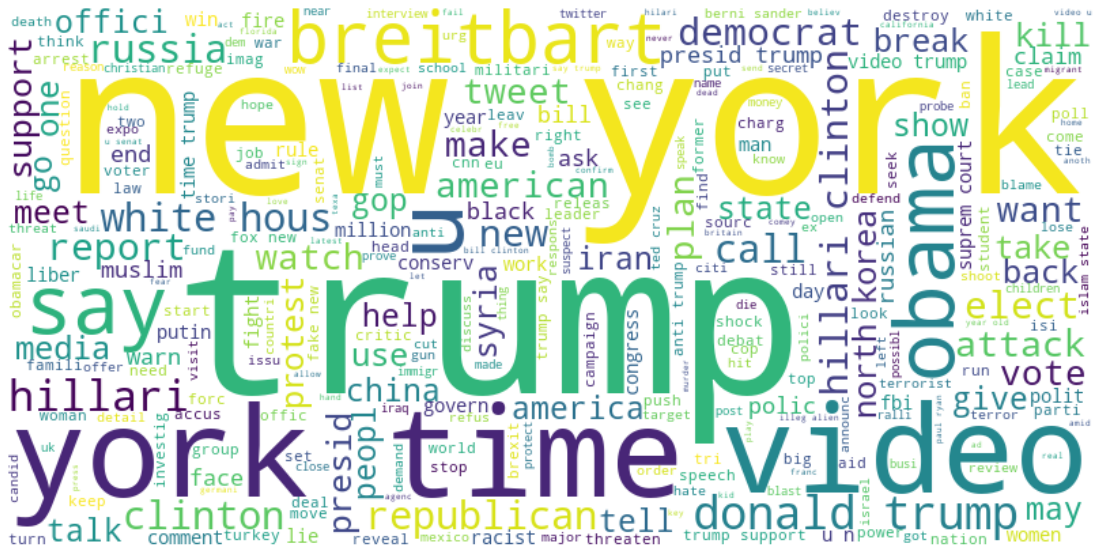

In [7]:
all_titles = ' '.join(title for title in X_train['title'])
wordcloud = WordCloud(
    background_color='white', 
    stopwords=STOPWORDS, 
    max_words=300,
    width=800, 
    height=400,
).generate(all_titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Comments and spot-on observations:
* many of available news are from around presidential election period in the USA, which could make them unrepresentative in general,
* aside from inside-American issues such as elections, other countries such as Russia or North Korea seem to be a popular topic.

#### All news' texts

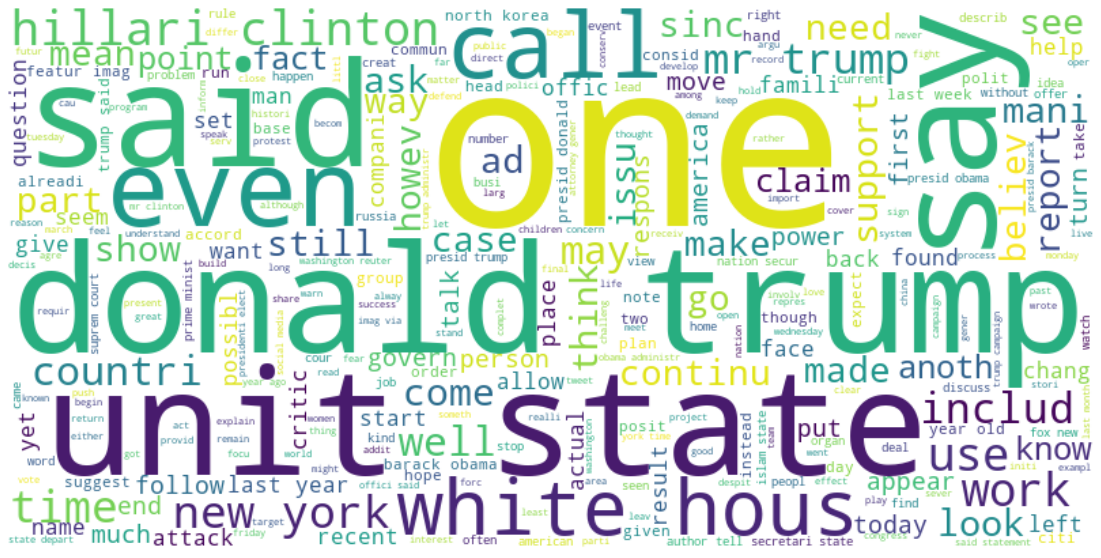

In [8]:
all_news = ' '.join(text for text in X_train['text'])
wordcloud = WordCloud(
    background_color='white', 
    stopwords=STOPWORDS, 
    max_words=300,
    width=800, 
    height=400,
).generate(all_news)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Comments and spot-on observations:
* Donald Trump is often the subject of the news,
* this visualization does not provide meaningful insight, since presented words without further context are like stop words.

#### Titles of fake vs. real news

In [9]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]

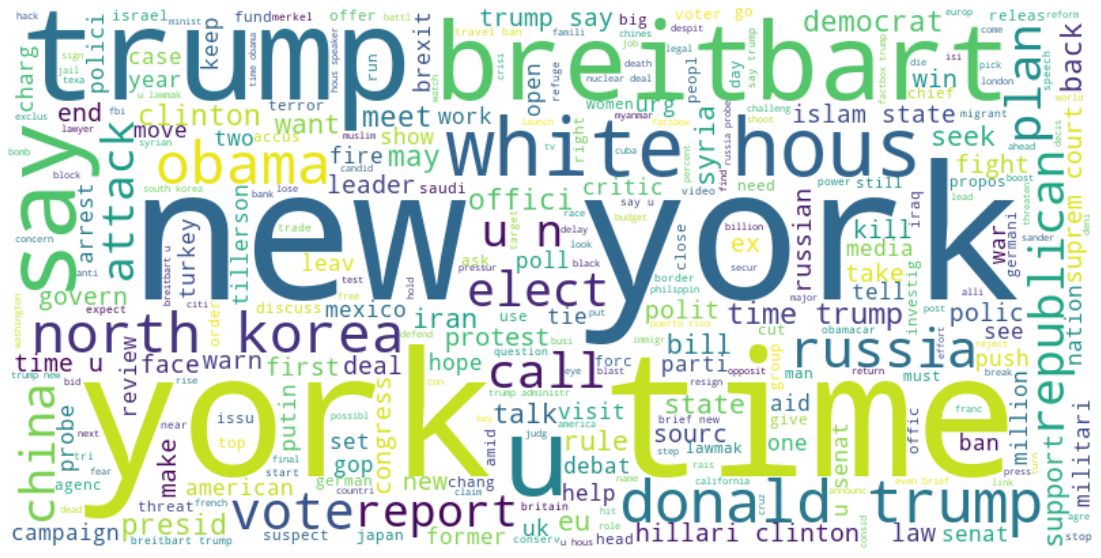

In [10]:
fake_titles = ' '.join(title for title in fake_news['title'])
wordcloud = WordCloud(
    background_color='white', 
    stopwords=STOPWORDS, 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

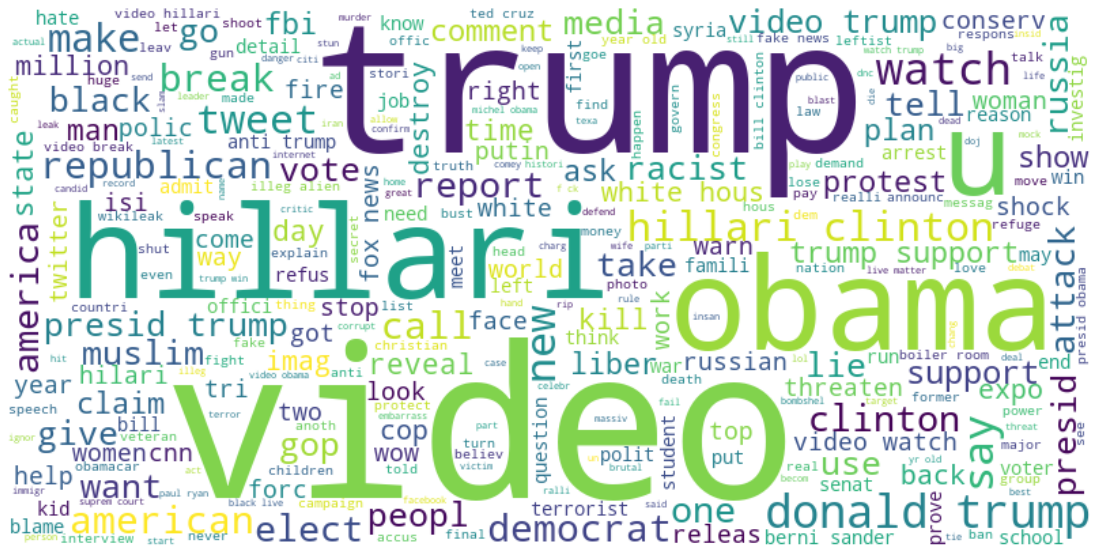

In [11]:
real_titles = ' '.join(title for title in real_news['title'])
wordcloud = WordCloud(
    background_color='white', 
    stopwords=STOPWORDS, 
    max_words=300,
    width=800, 
    height=400,
).generate(real_titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Comments and spot-on observations:
* both fake and real news often mention Donald Trump, Barrack Obama and Hillary Clinton,
* real news' titles seem to use word "video" more often,
* fake news' titles often use weird word "Breitbart".

In [12]:
video_fake, video_real = 0, 0
for title in fake_news['title']:
    if 'video' in title.lower():
        video_fake += 1
for title in real_news['title']:
    if 'video' in title.lower():
        video_real += 1

print(f"Number of times a fake news' title contains word 'video': {video_fake} out of {len(fake_news)}")
print(f"Number of times a real news' title contains word 'video': {video_real} out of {len(real_news)}")

Number of times a fake news' title contains word 'video': 138 out of 23468
Number of times a real news' title contains word 'video': 5954 out of 24461


In [13]:
breitbart_fake, breitbart_real = 0, 0
for title in fake_news['title']:
    if 'breitbart' in title.lower():
        breitbart_fake += 1
for title in real_news['title']:
    if 'breitbart' in title.lower():
        breitbart_real += 1

print(f"Number of times a fake news' title contains word 'Breitbart': {breitbart_fake} out of {len(fake_news)}")
print(f"Number of times a real news' title contains word 'Breitbart': {breitbart_real} out of {len(real_news)}")

Number of times a fake news' title contains word 'Breitbart': 1592 out of 23468
Number of times a real news' title contains word 'Breitbart': 38 out of 24461


In fact, there is slight tendency of utilizing words "video" and "Breitbart", although it is not significant enough to be viewed as a single indicator of being a fake news.

#### Texts of fake vs. real news

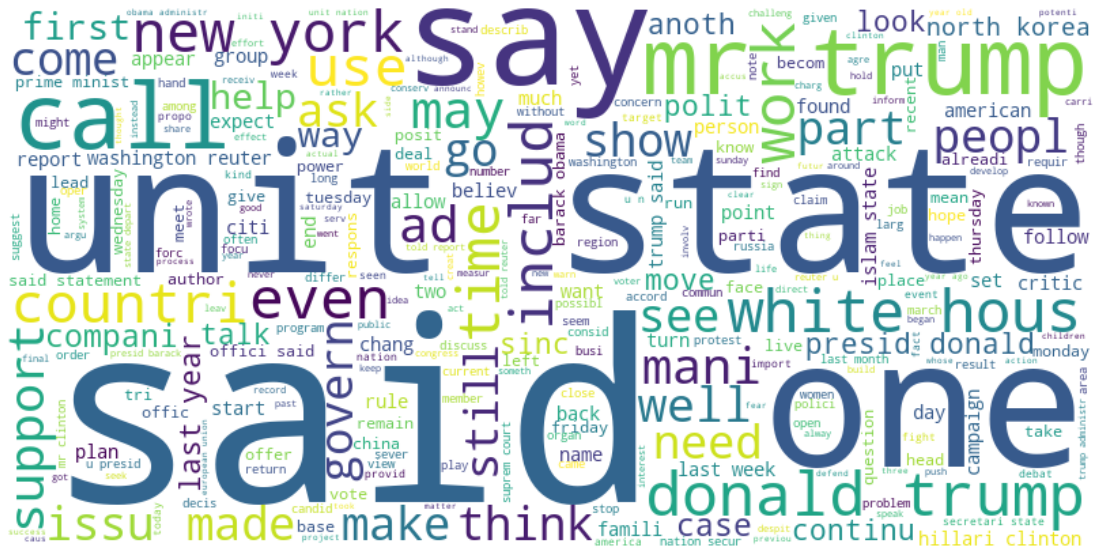

In [14]:
fake_texts = ' '.join(text for text in fake_news['text'])
wordcloud = WordCloud(
    background_color='white', 
    stopwords=STOPWORDS, 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

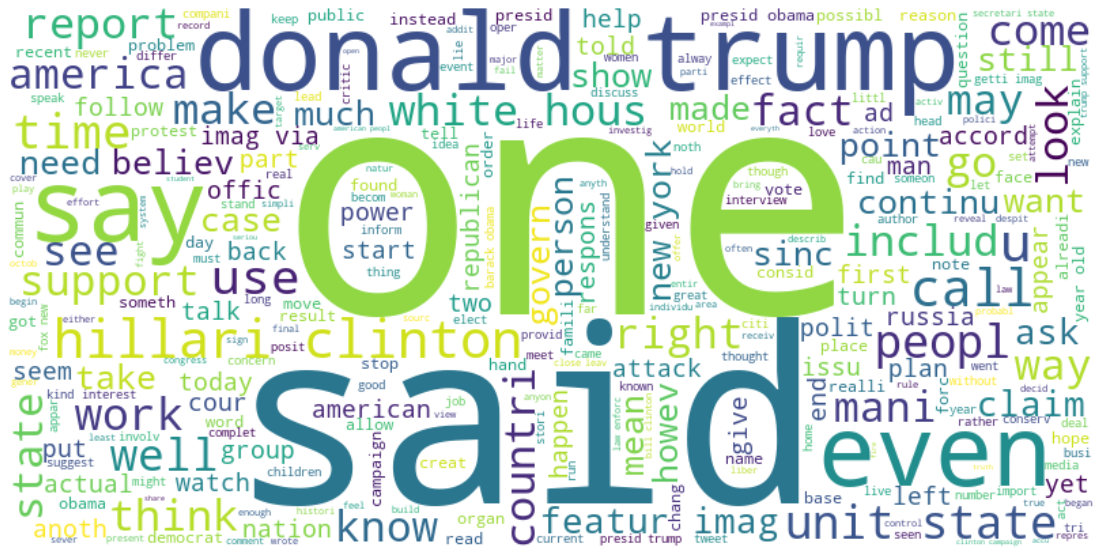

In [15]:
real_texts = ' '.join(text for text in real_news['text'])
wordcloud = WordCloud(
    background_color='white', 
    stopwords=STOPWORDS, 
    max_words=300,
    width=800, 
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Comments and spot-on observations:
* once again, single words are rather useless without context, so in this setting there is no clear indicator of being a fake news.

Now let's check, if there are other words occuring more often in either category of news.

In [16]:
real_texts = ' '.join(
    ' '.join(set(text.split())) for text in real_news['text']
)
fake_texts = ' '.join(
    ' '.join(set(text.split())) for text in fake_news['text']
)

In [17]:
factor = 1e2

In [18]:
real_texts_list = real_texts.split()
counter_real = Counter(real_texts_list)
counter_real = {k: v / len(real_texts_list) for k, v in counter_real.items()}

fake_texts_list = fake_texts.split()
counter_fake = Counter(fake_texts_list)
counter_fake = {k: v / len(fake_texts_list) for k, v in counter_fake.items()}

In [19]:
for real_word in set(counter_real.keys()).difference(set(counter_fake.keys())):
    freq = counter_real[real_word]
    if freq >= 1 / factor:
        print(real_word, freq)

In [20]:
for fake_word in set(counter_fake.keys()).difference(set(counter_real.keys())):
    freq = counter_fake[fake_word]
    if freq >= 1 / factor:
        print(fake_word, freq)

In [21]:
real_words, fake_words = [], []

for common_word in set(counter_fake.keys()).intersection(set(counter_real.keys())):
    fake_freq, real_freq = counter_fake[common_word], counter_real[common_word]
    
    ratio = real_freq / fake_freq
    if ratio >= factor:
        real_words.append((common_word, ratio))
        
    ratio = fake_freq / real_freq
    if ratio >= factor:
        fake_words.append((common_word, ratio))

In [22]:
print('Words more common in real news:\n')
for real_word, ratio in real_words:
    print(real_word, ratio)
print('\n\n')
print('Words more common in fake news:\n')
for fake_word, ratio in fake_words:
    print(fake_word, ratio)

Words more common in real news:

flickr 539.6643913208742
getelementsbytagnam 118.32805301502773
getti 346.87444824654546
raedl 165.88044815190804
screengrab 118.88098784220077
gage 141.55131575629485
nyp 164.774578497562



Words more common in fake news:

suu 131.11852688076922
rohingya 224.25789425124665
puigdemont 100.3734929914854
harar 101.2777586941114
kyi 131.11852688076922


Comments and spot-on observations:
* "flickr" could be an indicator of real news.